In [ ]:
# import our libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

np.random.seed(613)

In [ ]:
!pip install wordcloud

In [ ]:
!pip install matplotlib-venn

In [2]:
from wordcloud import WordCloud
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

In [ ]:
# load our data using seaborn
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

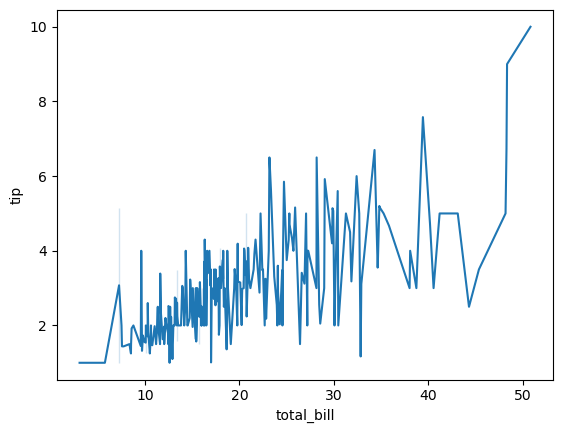

In [4]:
# create a simple line plot
sns.lineplot(data=tips,         # choose our dataset
             x='total_bill',    # define our x variable
             y='tip')           # define our y variable

<Axes: xlabel='total_bill', ylabel='tip'>

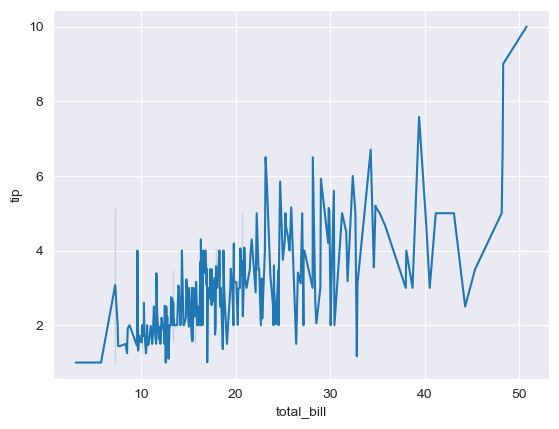

In [5]:
# using premade styles

# sns.set_style('whitegrid')
sns.set_style('darkgrid')

sns.lineplot(data=tips,
             x='total_bill',
             y='tip')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

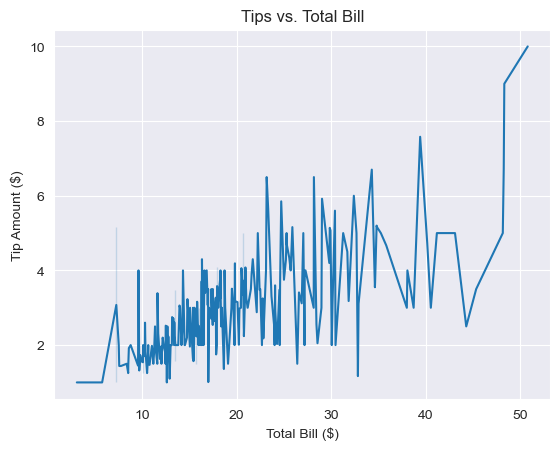

In [6]:
# adding title and axis labels
sns.set_style('darkgrid')

tipgraph = sns.lineplot(data=tips,
             x='total_bill',
             y='tip')

tipgraph.set(title='Tips vs. Total Bill',
             xlabel='Total Bill ($)',
             ylabel='Tip Amount ($)')

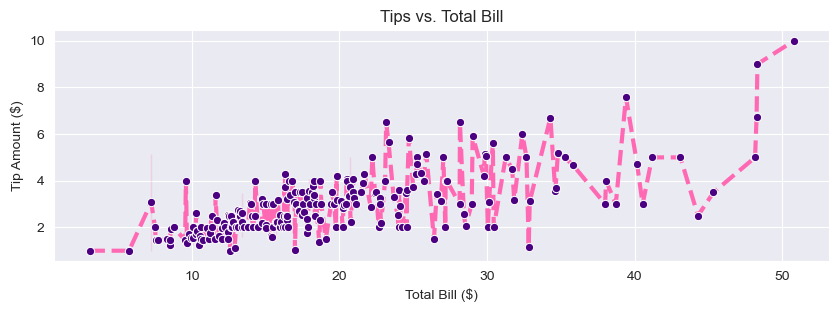

In [7]:
# using the subplots() function to change figure size
fig = plt.subplots(figsize=(10, 3))

tipgraph = sns.lineplot(data=tips,
                        x='total_bill',
                        y='tip',
                        color = 'hotpink',
                        linestyle = '--',
                        linewidth = 3,
                        marker = 'o',
                        markerfacecolor = 'indigo')

tipgraph.set(title='Tips vs. Total Bill',
             xlabel='Total Bill ($)',
             ylabel='Tip Amount ($)')

plt.show()      # only shows the plot and hides text information

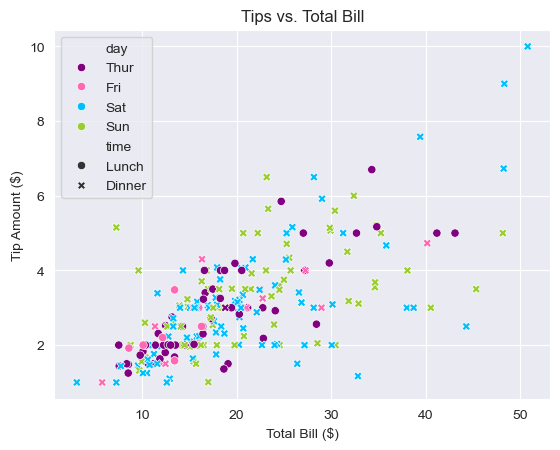

In [8]:
# represent multiple variables with different visual elements
tipgraph = sns.scatterplot(data=tips, x='total_bill',
                           y='tip', 
                           style = 'time',      # style changes the shape of our points 
                           hue ='day', 
                           palette = ['purple','hotpink', 'deepskyblue', 'yellowgreen'])

tipgraph.set(title='Tips vs. Total Bill',
             xlabel='Total Bill ($)',
             ylabel='Tip Amount ($)')

plt.show()

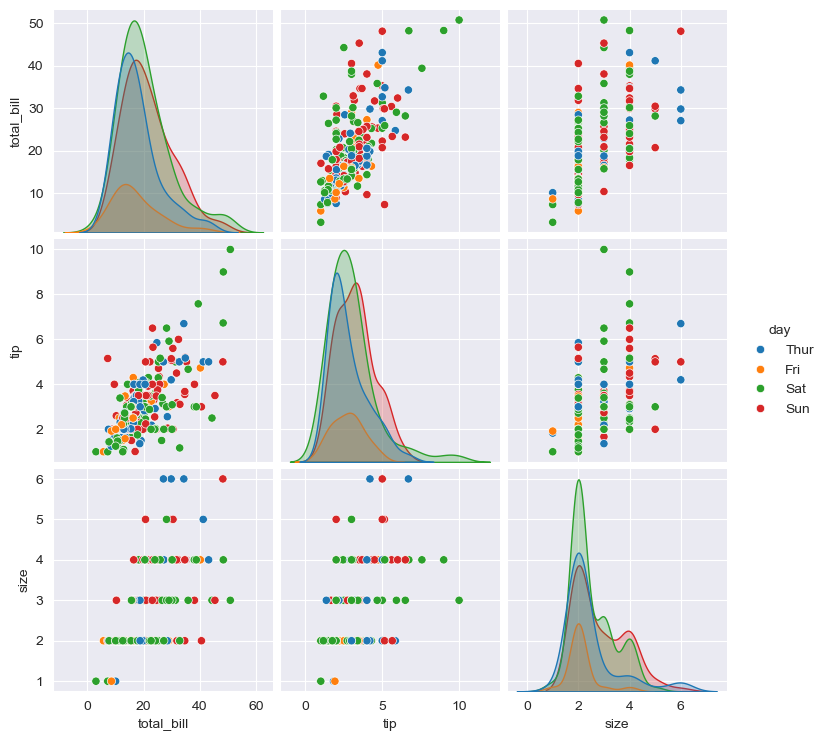

In [9]:
# pairplot allows us to explore multidimensional relationships between diff variables
sns.pairplot(data=tips, hue='day')

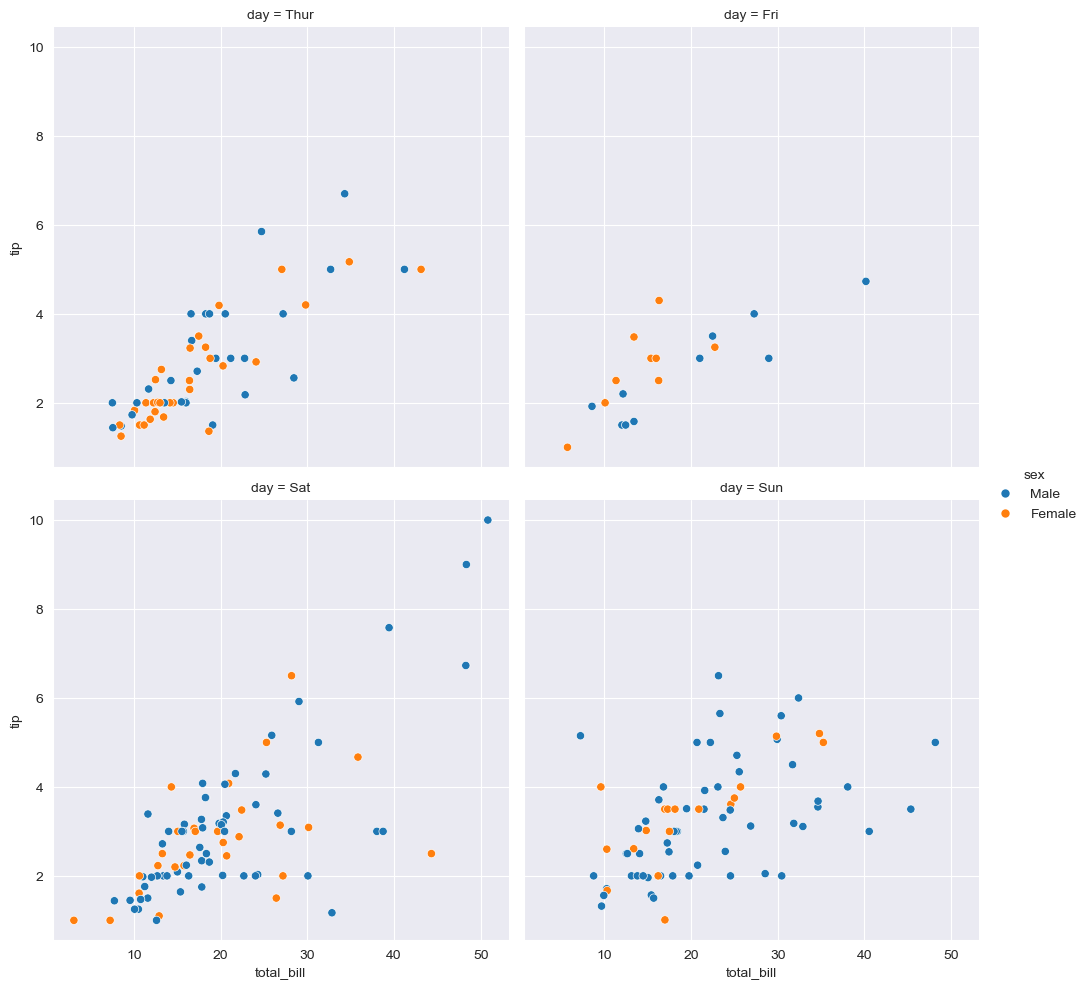

In [ ]:
# relplot allows you to compares specific levels within variables
daysplot = sns.relplot(data=tips,       # use our tips datset
                       x="total_bill",  # define our x variable
                       y="tip",         # define our y variable
                       hue="sex",       # define the colour of our points to vary by sex
                       col="day",       # add separate plots for each day, arranged in columns
                       kind="scatter",  # define the type of plot
                       col_wrap=2)      # show 2 plots per row

In [ ]:
# import our plotly packages
import plotly.graph_objects as go
import nbformat

x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

In [ ]:
# making our plot
graph = go.Figure()     # go = graph object

graph.add_trace(go.Bar(x=x1, y=y1))

graph.update_layout(title="Pirate Scores",
                    xaxis_title="Pirates",
                    yaxis_title="Score")

graph.show()            # optional

In [ ]:
# customizing plotly graphs

graph = go.Figure()

graph.add_trace(go.Scatter(x=x1, 
                           y=y1, 
                           mode='markers',                  # points for a scatter plot
                           marker=dict(size=15,             # point size
                                       color='hotpink',     # point colour
                                       opacity=1,           # point transparency/alpha
                                       line=dict (width=5, color='purple') # point outline
)))

graph.update_layout(title='Interactive Pirate Plot',
                    xaxis_title='Pirates',
                    yaxis_title='Scores',
                    width=500, 
                    height=500)

In [ ]:
# making wordclouds
from wordcloud import WordCloud     # import our packages

df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
                 on_bad_lines='skip')

df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


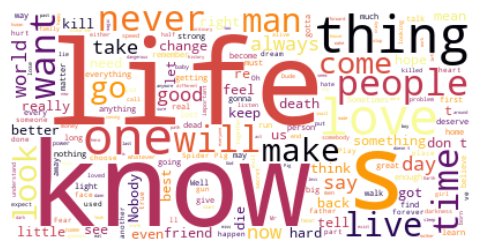

In [16]:
# take every entry from the quote column from dataset and join them together
text = " ".join(each for each in df.quote)

# generate our wordcloud image
wordcloud = WordCloud(background_color="white",
                      colormap = 'inferno',
                      random_state = 613).generate(text)

# use matplotlib syntax to put our image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud,                    # remember 'imshow' from when we added pictures to our matplotlib axes
          interpolation='bilinear')     # this line helps smooth our image
ax.axis("off")

plt.show()

In [ ]:
# import our matplotlib venn diagram packages
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

# create our sets
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

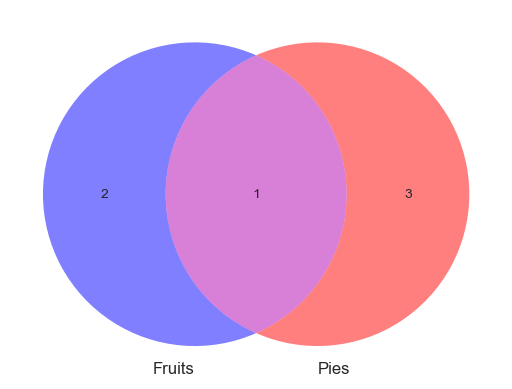

In [19]:
# building our venn diagram
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

diagram = venn2_unweighted([A, B],
                           set_labels = ('Fruits', 'Pies'),
                           set_colors=("blue", "red"),
                           alpha=0.5)

plt.show()

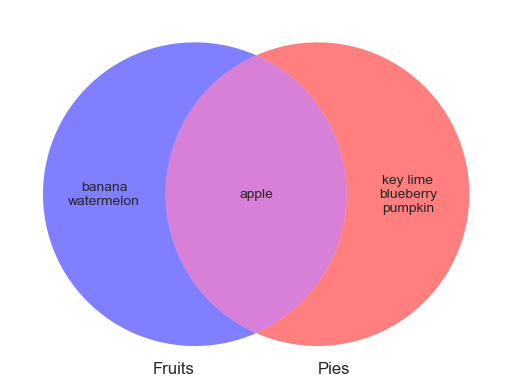

In [ ]:
# assigning text content for each circle
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

diagram = venn2_unweighted([A, B],
                           set_labels = ('Fruits', 'Pies'),
                           set_colors=("blue", "red"),
                           alpha=0.5)

diagram.get_label_by_id("10").set_text("\n".join(A - B))     # left circle
diagram.get_label_by_id("11").set_text("\n".join(A & B))     # middle slice
diagram.get_label_by_id("01").set_text("\n".join(B - A))     # right circle
# \n says to space each of the text as a new line
# (10) - binary numbers to indicate 'on' (left circle) and 'off' (right circle) for each circle
# (11) - to include a middle splice, we need both circles 'on'